# 1. Import dependents

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from perceptron import Perceptron

# 2. Load data and preprocessing data

In [2]:
df = pd.read_csv('HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


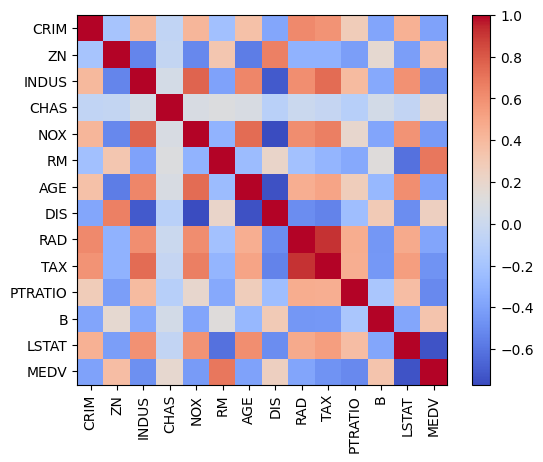

In [3]:
corr_matrix = df.corr()
plt.imshow(corr_matrix.to_numpy(), cmap='coolwarm', interpolation='nearest') 
plt.colorbar()

plt.xticks(ticks=range(len(corr_matrix.columns)), labels=corr_matrix.columns, rotation=90)
plt.yticks(ticks=range(len(corr_matrix.columns)), labels=corr_matrix.columns)

plt.show()

In [4]:
df = df.dropna(subset=['ZN'])
X = df[['RM', 'ZN']].values
Y = df['MEDV'].values

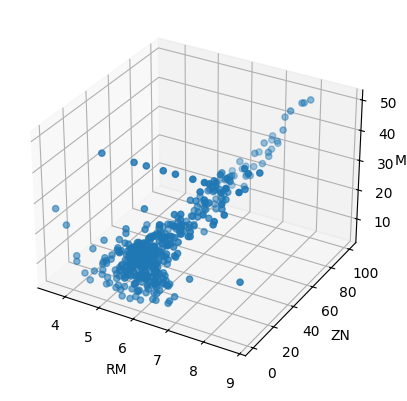

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], Y)
ax.set_xlabel('RM')
ax.set_ylabel('ZN')
ax.set_zlabel('MEDV')
plt.show()

# 3. Train, Test split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=42)

In [7]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# 4. Initial model

In [14]:
model = Perceptron(
    weight_learning_rate=.001,
    bias_learning_rate=.001,
    epochs=20,
    num_features=2
)

# 5. Train model

In [15]:
model.train(x_train, y_train)

Epoch: 1, Loss: 18.900134389430598
Epoch: 2, Loss: 12.92555554198997
Epoch: 3, Loss: 9.205009414804538
Epoch: 4, Loss: 7.1012650862645
Epoch: 5, Loss: 5.944636757882663
Epoch: 6, Loss: 5.329057143018517
Epoch: 7, Loss: 5.015439968255043
Epoch: 8, Loss: 4.864244384960189
Epoch: 9, Loss: 4.7818465207287915
Epoch: 10, Loss: 4.7362820105574786
Epoch: 11, Loss: 4.7100215610737015
Epoch: 12, Loss: 4.694659762402568
Epoch: 13, Loss: 4.68597820491116
Epoch: 14, Loss: 4.680701670407149
Epoch: 15, Loss: 4.67715648545262
Epoch: 16, Loss: 4.674683575215509
Epoch: 17, Loss: 4.672898281462095
Epoch: 18, Loss: 4.67160009971573
Epoch: 19, Loss: 4.670680173728972
Epoch: 20, Loss: 4.670000165734777


# 6. Evaluate model

In [16]:
model.evaluate(x_test, y_test)

8.05026503069252

In [17]:
y_pred = model.predict(x_test)

In [ ]:
x1 = x_test[:, 0]
x2 = x_test[:, 1]
y_actual = y_test
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y_actual, color='blue', label='Actual Data')
x1_grid, x2_grid = np.meshgrid(np.linspace(x1.min(), x1.max(), 20),
                               np.linspace(x2.min(), x2.max(), 20))
X_grid = np.c_[x1_grid.ravel(), x2_grid.ravel()]
y_pred_grid = model.predict(X_grid).reshape(x1_grid.shape)
ax.plot_surface(x1_grid, x2_grid, y_pred_grid, color='red', alpha=0.5)
def rotate(angle):
    ax.view_init(elev=20, azim=angle)
ani = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 360, 2), interval=50)

ani.save("outputs/3d_regression.gif", writer="pillow", fps=20)

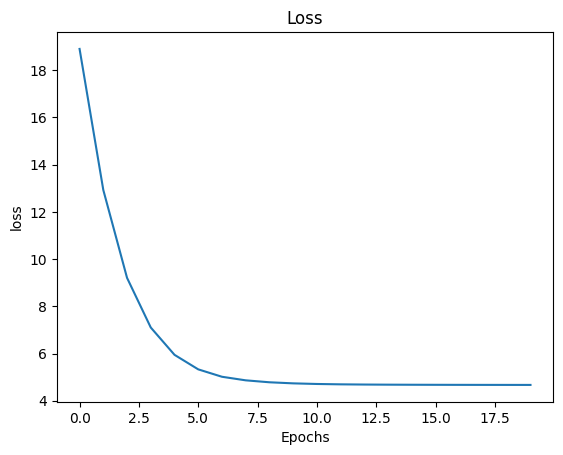

In [19]:
plt.plot(model.losses)
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.show()